# Madhya Pradesh 2023 Election Analysis

### Introduction
###### On November 2023 there were 5 state assembly elections held. BJP won the 3 states out of 5. One of them is state of Madhya Pradesh. Madhya Pradesh is large state with 230 constituencies for state assembly. Therefore I thought it would be great to analyze the election result of Madhya Pradesh with Pandas, Matplotlib, Seaborn and other libraries to get the insights by analysing the data. 

### Data Collection

##### Initially, we scraped the data from the ECI website, but this method was later prohibited. Therefore, we opted to manually copy the data for all 230 constituencies to individual CSV files. We also scraped the data from Wikipedia for constituency names corresponding to constituency numbers.

##### Data sources:
##### https://results.eci.gov.in/AcResultGenDecNew2023/ConstituencywiseS12166.htm
##### https://en.wikipedia.org/wiki/List_of_constituencies_of_the_Madhya_Pradesh_Legislative_Assembly

##### The data consists of "Candidate", "Party", "EVM Votes", "Postal Votes", "Total Votes", "% of Votes", "constituency number",and constituency name columns.
##### Candidate: This column lists the names of the candidates who participated in each Madhya Pradesh state assembly constituency.
##### Party: This column shows the party names of the candidates participating in each constituency.
##### EVM Votes: This column details the number of votes cast through Electronic Voting Machines in each constituency.
##### Postal Votes: This column shows the number of votes received via postal ballot in each constituency.
##### Total Votes: This column shows the total number of votes received by each candidate in each constituency.
##### % of Votes: This column shows the percentage of vote share each candidate gained in their respective constituency.
##### constituency_number: This column provides the unique identification number for each constituency in Madhya Pradesh.
##### constituency_name: This column provides the names for each constituency in Madhya Pradesh

In [1]:
#Improting libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 100)

In [2]:
# from tqdm import tqdm
# constituency_wise_data_list = []
# for num in tqdm(range(1,231)):
#   url = 'https://results.eci.gov.in/AcResultGenDecNew2023/ConstituencywiseS12' + str(num) + '.htm'

#   df = pd.read_html(url)[0]
#   df['constituency_number'] = num
#   constituency_wise_data_list.append(df)

# constituency_wise_data_df = pd.concat(constituency_wise_data_list)

In [3]:
constituency_wise_data_df = pd.read_csv('E:\Portfolio Projects Dataset\MP_Election_data.csv')

In [112]:
constituency_wise_data_df

,S.N.,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,percent_of_votes,constituency_number,constituency_name
0,1,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45,1,Sheopur
1,2,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70,1,Sheopur
2,3,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88,1,Sheopur
3,4,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35,1,Sheopur
4,5,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11,1,Sheopur
...,...,...,...,...,...,...,...,...,...
2760,5,SAVITRI MEGHWAL,United National Party,286,0,286,0.18,230,Jawad
2761,6,AHIR PURANMAL,Independent,36085,66,36151,22.72,230,Jawad
2762,7,OM PRAKASH,Independent,724,0,724,0.46,230,Jawad
2763,8,MO BHURA KURESHI,Independent,397,0,397,0.25,230,Jawad


###### Scrape the data from wikipedia for constituency name so that we can merge with the main DataFrame

In [5]:
import pandas as pd

constituency_wise_data_list = []
url = 'https://en.wikipedia.org/wiki/List_of_constituencies_of_the_Madhya_Pradesh_Legislative_Assembly'

constituency_name_df = pd.read_html(url)[2]
constituency_name_df

,No.,Name,Reserved,District,Lok Sabha constituency,Electors (2009)[7]
0,1,Sheopur,None,Sheopur,Morena,169230
1,2,Vijaypur,None,Sheopur,Morena,158561
2,3,Sabalgarh,None,Morena,Morena,155076
3,4,Joura,None,Morena,Morena,173767
4,5,Sumawali,None,Morena,Morena,175095
...,...,...,...,...,...,...
225,226,Suwasra,None,Mandsaur,Mandsour,198249
226,227,Garoth,None,Mandsaur,Mandsour,185692
227,228,Manasa,None,Neemuch,Mandsour,147829
228,229,Neemuch,None,Neemuch,Mandsour,167545


###### We only need constituency number and name. Hence drop the unused columns

In [6]:
constituency_name_df.drop(columns = ['Reserved', 'District', 'Lok Sabha constituency', 'Electors (2009)[7]'], axis = 1, inplace = True)

###### rename the columns for convenience

In [7]:
constituency_name_df.rename(columns={'No.':'constituency_number', 'Name':'constituency_name'}, inplace = True)

In [8]:
constituency_name_df

,constituency_number,constituency_name
0,1,Sheopur
1,2,Vijaypur
2,3,Sabalgarh
3,4,Joura
4,5,Sumawali
...,...,...
225,226,Suwasra
226,227,Garoth
227,228,Manasa
228,229,Neemuch


###### Merge the constituency name to the Dataset

In [9]:
constituency_wise_data_df = constituency_wise_data_df.merge(constituency_name_df, on = 'constituency_number', how = 'left')

In [10]:
constituency_wise_data_df

,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% ofVotes,constituency_number,constituency_name
0,1,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45,1,Sheopur
1,2,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70,1,Sheopur
2,3,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88,1,Sheopur
3,4,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35,1,Sheopur
4,5,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11,1,Sheopur
...,...,...,...,...,...,...,...,...,...
2760,5,SAVITRI MEGHWAL,United National Party,286,0,286,0.18,230,Jawad
2761,6,AHIR PURANMAL,Independent,36085,66,36151,22.72,230,Jawad
2762,7,OM PRAKASH,Independent,724,0,724,0.46,230,Jawad
2763,8,MO BHURA KURESHI,Independent,397,0,397,0.25,230,Jawad


###### Renaming the columns for convenience

In [11]:
constituency_wise_data_df.rename(columns = {'EVM Votes': 'EVM_Votes','Postal Votes':'Postal_Votes','Total Votes':'Total_Votes','% ofVotes':'percent_of_votes'}, inplace=True)

In [12]:
constituency_wise_data_df

,S.N.,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,percent_of_votes,constituency_number,constituency_name
0,1,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45,1,Sheopur
1,2,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70,1,Sheopur
2,3,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88,1,Sheopur
3,4,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35,1,Sheopur
4,5,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11,1,Sheopur
...,...,...,...,...,...,...,...,...,...
2760,5,SAVITRI MEGHWAL,United National Party,286,0,286,0.18,230,Jawad
2761,6,AHIR PURANMAL,Independent,36085,66,36151,22.72,230,Jawad
2762,7,OM PRAKASH,Independent,724,0,724,0.46,230,Jawad
2763,8,MO BHURA KURESHI,Independent,397,0,397,0.25,230,Jawad


###### Check for NULL values in the dataset

In [113]:
constituency_wise_data_df.isnull().sum()

S.N.                   0
Candidate              0
Party                  0
EVM_Votes              0
Postal_Votes           0
Total_Votes            0
percent_of_votes       0
constituency_number    0
constituency_name      0
dtype: int64

###### The shape of the dataset

In [114]:
constituency_wise_data_df.shape

(2765, 9)

###### Information about the columns in the dataset

In [115]:
constituency_wise_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 2764
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.N.                 2765 non-null   int64  
 1   Candidate            2765 non-null   object 
 2   Party                2765 non-null   object 
 3   EVM_Votes            2765 non-null   int64  
 4   Postal_Votes         2765 non-null   int64  
 5   Total_Votes          2765 non-null   int64  
 6   percent_of_votes     2765 non-null   float64
 7   constituency_number  2765 non-null   int64  
 8   constituency_name    2765 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 280.6+ KB


## Party and Candidate analysis

###### Parties that are contested in the election

In [13]:
# Unique party names
constituency_wise_data_df['Party'].unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Bahujan Samaj Party', 'Social Democratic Party Of India',
       'Rashtriya Krantikari Samajwadi Party',
       'Parivartan Party of India', 'Aazad Samaj Party (Kanshi Ram)',
       'Independent', 'None of the Above', 'Public Political Party',
       'Communist Party of India (Marxist)',
       'Bharatiya Sampuran Krantikari Party', 'Samajwadi Party',
       'Aam Aadmi Party', 'Bharatiya Majdoor Janta Party',
       'Jan Adhikar Party', 'All India Forward Bloc',
       'Parivartan Samaj Party', 'Rashtriya Samanta Dal',
       'Bahujan Mukti Party', 'Samata Samadhan Party',
       'Samatamoolak Samaj Party', 'Peoples Party of India (Democratic)',
       'Jai Prakash Janata Dal', 'Vikas India Party',
       'Loktantrik Samajwadi Party', 'Sapaks Party',
       'Ambedkarite Party of India', 'Rashtra Nirman Party',
       'Akhand Bharat Samrajya Party', 'Communist Party of India',
       'Indian Peoples Adhikar Party', 'Sw

###### Total number of parties contested in the election

In [14]:
# Number of parties contested in an election
constituency_wise_data_df['Party'].nunique()

108

###### Total number of candidates contested in the election

In [15]:
# Total number of candidates participated in this election
constituency_wise_data_df['Candidate'].nunique()

2492

###### Average number of condidates participated in across the state

In [118]:
# Average candidates participated
avg_candidates = (constituency_wise_data_df[constituency_wise_data_df['Party']!='None of the Above'].groupby('constituency_name')['Candidate'].count()).mean()
avg_candidates

11.017391304347827

###### With above analysis, there are total of 108 political parties  and 2492 candidates particicpated with an average of 11 candidates in an election. "Independent" is considered as a single party for simplifying the analysis. Also "Independent" analysis has been done seperatly.

### Analysing party count for diffrent scinario using "Independent" and "NOTA" 

###### Number of parties contested in each constituency considering "Independent" as a single party with exception of NOTA(None of the above)

In [122]:
#constituency_wise_data_df.groupby('constituency_name')['Party'].nunique().sub(1)
#constituency_wise_data_df.drop_duplicates(['constituency_name', 'Party']).groupby('constituency_name')['Party'].count()-1

party_count_with_independednt = constituency_wise_data_df[constituency_wise_data_df['Party']!='None of the Above'].groupby('constituency_name')['Party'].nunique()
party_count_with_independednt

constituency_name
Agar                5
Alirajpur           4
Alot                5
Amarpatan          11
Amarwara            5
                   ..
Ujjain South        5
Vidisha             5
Vijaypur            5
Vijayraghavgarh     9
Waraseoni           7
Name: Party, Length: 230, dtype: int64

In [19]:
party_count_with_independednt.mean()

6.926086956521739

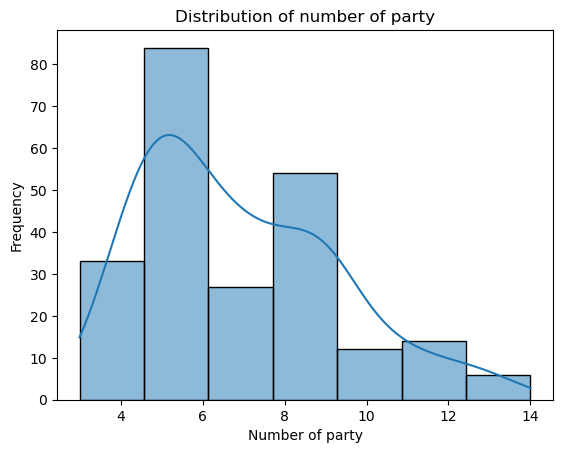

In [22]:
sns.histplot(party_count_with_independednt, kde = True, bins = 7)
plt.title('Distribution of number of party')
plt.xlabel('Number of party')
plt.ylabel('Frequency')
plt.show()

###### Here, Treating 'Independent' as a single party and leaving out NOTA, we use the histogram to analyze the  distribution of number of party count without NOTA considering 'Independent' as one party having an average party count of 6.92.

###### Distribution of number of party count in each constituency without independednt and NOTA

In [23]:
# Distribution of number of party count without independednt and NOTA

party_count_without_independednt = constituency_wise_data_df[constituency_wise_data_df['Party']!='Independent'].groupby('constituency_name')['Party'].nunique() -1
party_count_without_independednt

constituency_name
Agar                4
Alirajpur           3
Alot                4
Amarpatan          10
Amarwara            4
                   ..
Ujjain South        4
Vidisha             4
Vijaypur            4
Vijayraghavgarh     8
Waraseoni           6
Name: Party, Length: 230, dtype: int64

In [24]:
party_count_without_independednt.mean()

5.947826086956522

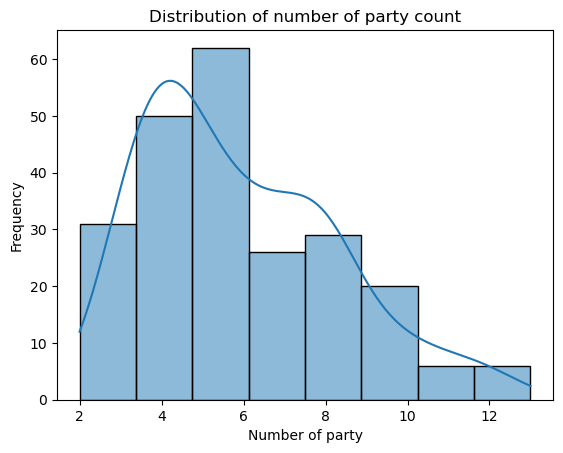

In [26]:
sns.histplot(party_count_without_independednt, kde = True, bins = 8)
plt.title('Distribution of number of party count')
plt.xlabel('Number of party')
plt.ylabel('Frequency')
plt.show()

###### Here, leaving out 'Independent' and 'NOTA', we use the histogram to analyze the  distribution of number of party count having an average party count of 5.95.

###### For distribution of party count I have done two separate analysis for NOTA, with NOTA and without NOTA as a party.

In [27]:
# Distribution of number of party with NOTA

party_count_with_NOTA = constituency_wise_data_df.groupby('constituency_number')['Party'].nunique()
party_count_with_NOTA

constituency_number
1       9
2       6
3      10
4      13
5       6
       ..
226     6
227     5
228     7
229     7
230     7
Name: Party, Length: 230, dtype: int64

In [28]:
party_count_with_NOTA.mean()

7.926086956521739

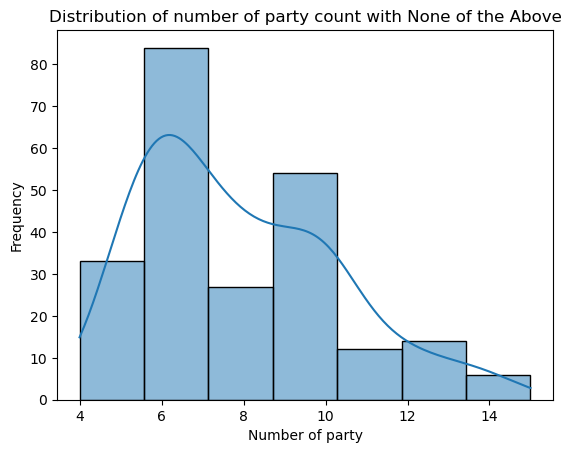

In [30]:
sns.histplot(party_count_with_NOTA, kde = True, bins = 7)
plt.title('Distribution of number of party count with None of the Above')
plt.xlabel('Number of party')
plt.ylabel('Frequency')
plt.show()

###### Distribution of party without NOTA

In [31]:
# Distribution of number of party without NOTA

party_count_without_NOTA = constituency_wise_data_df[constituency_wise_data_df['Party']!= 'None of the Above'].groupby(['constituency_number'])['Party'].nunique()
party_count_without_NOTA

constituency_number
1       8
2       5
3       9
4      12
5       5
       ..
226     5
227     4
228     6
229     6
230     6
Name: Party, Length: 230, dtype: int64

In [32]:
party_count_without_NOTA.mean()

6.926086956521739

In [33]:
party_count_without_NOTA.std()

2.3860433696473025

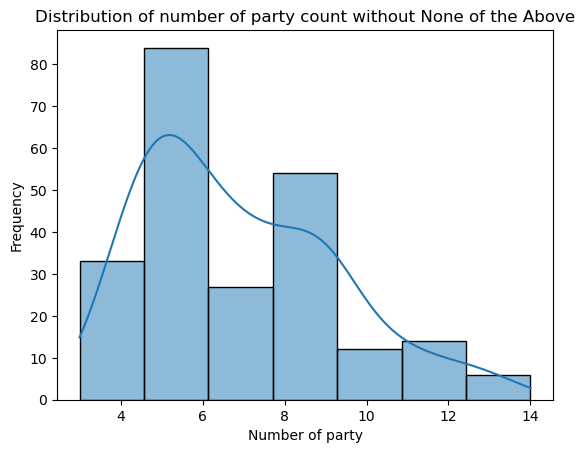

In [34]:
sns.histplot(party_count_without_NOTA, kde = True, bins = 7)
plt.title('Distribution of number of party count without None of the Above')
plt.xlabel('Number of party')
plt.ylabel('Frequency')
plt.show()

###### Number of candidates contested in each constituency

In [125]:
# Number of candidates participated in each constituency
candidates_count = constituency_wise_data_df[constituency_wise_data_df['Candidate']!= 'NOTA'].groupby('constituency_name')['Candidate'].count()
candidates_count

constituency_name
Agar                9
Alirajpur           6
Alot                9
Amarpatan          17
Amarwara            9
                   ..
Ujjain South        9
Vidisha            10
Vijaypur           12
Vijayraghavgarh    13
Waraseoni          11
Name: Candidate, Length: 230, dtype: int64

In [126]:
# candidates_count = constituency_wise_data_df[constituency_wise_data_df['Party']!='Independent'].groupby('constituency_name')['Candidate'].count() - 1

# sns.histplot(candidates_count, kde=True, bins=10)
# plt.title('Distribution of Candidates Participation without Independent candidates in Constituencies')
# plt.xlabel('Number of Candidates')
# plt.ylabel('Frequency')
# plt.show()

In [127]:
candidates_count.mean()

11.017391304347827

In [128]:
candidates_count.std()

4.593488097620463

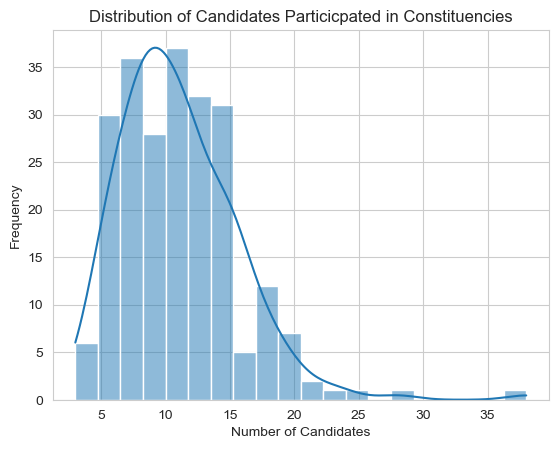

In [129]:
sns.histplot(candidates_count, kde=True, bins=20)
plt.title('Distribution of Candidates Particicpated in Constituencies')
plt.xlabel('Number of Candidates')
plt.ylabel('Frequency')
plt.show()

###### As we can see on the histogram that candidate contest count more than 35 in a constituency. Hence we shall explore that constituency for more information.

In [40]:
# Constituency with more than 30 Candidates particicpated

count = constituency_wise_data_df[constituency_wise_data_df['Party'] != 'NOTA'].groupby('constituency_number')['Party'].count()
count[count>30]

constituency_number
9    39
Name: Party, dtype: int64

###### Number of candidates particicpation calculated by grouping the constituency number and couting the candidate list with exception of NOTA.  Candidates particicpation in each constituency with an average of 11.02 and with standard deviation of 4.58. Also distribution shows the constituency number 9 with 39 candidates participation with most contested as 'Independent'  and major candidates recieved less than 1% votes.

In [41]:
constituency_wise_data_df[constituency_wise_data_df['constituency_number'] == 9]

,S.N.,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,percent_of_votes,constituency_number,constituency_name
113,1,ARVIND BHADORIA,Bharatiya Janata Party,48819,495,49314,32.27,9,Ater
114,2,HARI SHANKAR FHOGI,Bahujan Samaj Party,18690,97,18787,12.29,9,Ater
115,3,HEMANT SATYADEV KATARE,Indian National Congress,68607,935,69542,45.51,9,Ater
116,4,OM PRAKASH JAREHA,Peoples Party of India (Democratic),502,5,507,0.33,9,Ater
117,5,POOJA-HEERENDRA PRATAP (PUR),Aazad Samaj Party (Kanshi Ram),289,3,292,0.19,9,Ater
118,6,MUNNA SINGH BHADOURIA,Samajwadi Party,10208,80,10288,6.73,9,Ater
119,7,ANIL SINGH,Independent,70,0,70,0.05,9,Ater
120,8,ABHISHEK MISHRA,Independent,30,0,30,0.02,9,Ater
121,9,ARVIND TYAGI,Independent,53,1,54,0.04,9,Ater
122,10,ARUN KATARE,Independent,28,3,31,0.02,9,Ater


###### Total number of candidates per party across the election. Assuming "Independent" as single party for simplify the count

In [138]:
# Total number of candidates per party across the election

constituency_wise_data_df.groupby('Party')['Candidate'].count()

Party
Aadim Samaj Party              3
Aam Aadmi Party               66
Aam Bhartiya Party             5
Aapka Gantantra Party          5
Aapki Apni Party (Peoples)     1
                              ..
United National Party          2
Vanchit Bahujan Aaghadi        3
Vastavik Bharat Party          9
Vikas India Party              1
Vindhya Janta Party           20
Name: Candidate, Length: 108, dtype: int64

###### The above data provides you highest number of candidates contested as "Independent" with maximum count of 1166. Therefore we shall explore Independent.

In [147]:
# Count of Independent Candidates in each constituency
total_independednt_count = constituency_wise_data_df[constituency_wise_data_df['Party'] == 'Independent'].groupby('constituency_number')['Candidate'].count().sum()
independednt_count

constituency_number
1      7
2      8
3      3
4      4
5      4
      ..
226    5
227    4
228    1
229    4
230    3
Name: Candidate, Length: 225, dtype: int64

In [148]:
independednt_count.mean()

5.182222222222222

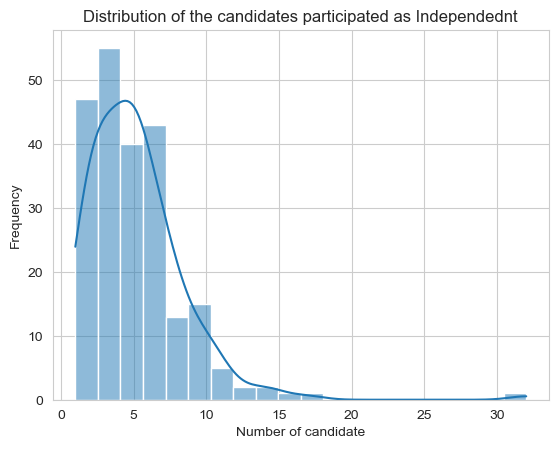

In [150]:
sns.histplot(independednt_count, kde = True, bins = 20)
plt.title('Distribution of the candidates participated as Independednt')
plt.xlabel('Number of candidate')
plt.ylabel('Frequency')
plt.show()

In [151]:
# Count of Independent Candidates constituency with more than 30 candidates
independednt_count = constituency_wise_data_df[constituency_wise_data_df['Party'] == 'Independent'].groupby('constituency_number')['Candidate'].count()
independednt_count[independednt_count>30]

constituency_number
9    32
Name: Candidate, dtype: int64

###### From the above analysis, total number of Independent candidates contested across the state election 1166 with the average of 5.18, which is more than winning party BJP and the second highest candidate winning party INC. 
###### Also on histogram we can notice that there is a skewness of the right which indicates more number of candidates contested in one of the constituency, which is constituency number 9 with 32 Independent candidates. However when we explore all these candidates recieved <1% votes.

In [154]:
constituency_wise_data_df[(constituency_wise_data_df['constituency_number']== 9) & (constituency_wise_data_df['Party'] == 'Independent')]

,S.N.,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,percent_of_votes,constituency_number,constituency_name
119,7,ANIL SINGH,Independent,70,0,70,0.05,9,Ater
120,8,ABHISHEK MISHRA,Independent,30,0,30,0.02,9,Ater
121,9,ARVIND TYAGI,Independent,53,1,54,0.04,9,Ater
122,10,ARUN KATARE,Independent,28,3,31,0.02,9,Ater
123,11,ASHOK SINGH,Independent,96,1,97,0.06,9,Ater
124,12,ASHA RAM,Independent,236,1,237,0.16,9,Ater
125,13,UMESH GARG,Independent,89,1,90,0.06,9,Ater
126,14,KESHAV SINGH GURJAR,Independent,169,0,169,0.11,9,Ater
127,15,CHANDRAVEER SINGH KUSHWAH,Independent,108,1,109,0.07,9,Ater
128,16,CHANDRA PRAKASH SHARMA,Independent,563,0,563,0.37,9,Ater


### Top 5 parties with highest voteshare

In [46]:
top_5_voted_party = constituency_wise_data_df.groupby('Party')['Total_Votes'].sum().sort_values(ascending = False).iloc[:5]

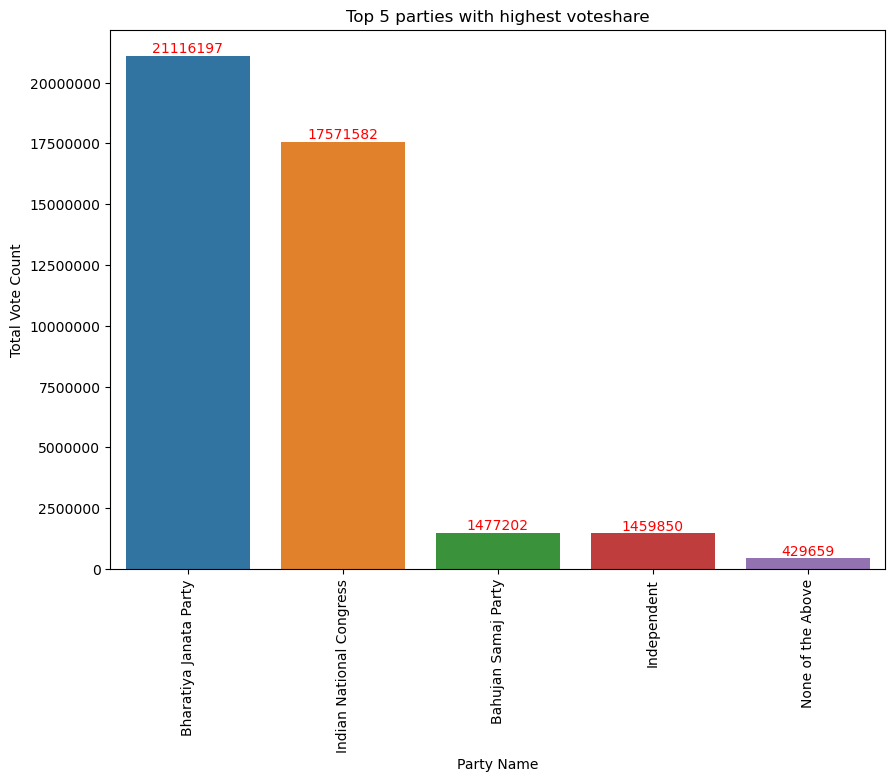

In [47]:
string = top_5_voted_party.values
plt.figure(figsize=(10,7))
sns.barplot(x = top_5_voted_party.index, y = top_5_voted_party.values)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Top 5 parties with highest voteshare')
plt.xlabel('Party Name')
plt.ylabel('Total Vote Count')
plt.xticks(rotation = 90)
for i in range(len(top_5_voted_party.values)):
    plt.text(i, top_5_voted_party.values[i], f'{string[i]}',color='red', ha='center', va='bottom')
plt.show()

###### The above bar graph shows BJP and INC has very high vote share compared to the rest having very less vote share. BJP gained more than 21 million (2 Cr) vote and INC received more than 17 million (1.75 Cr) votes. Another important factor to note that None of the above(NOTA) has the 5th position of vote share

#### Parties with votes less than NOTA

In [48]:
sorted_total_votes = constituency_wise_data_df.groupby('Party')['Total_Votes'].sum().sort_values(ascending = False)
sorted_total_votes[5:]

Party
Gondvana Gantantra Party          400026
Aam Aadmi Party                   233458
Samajwadi Party                   197935
Aazad Samaj Party (Kanshi Ram)    142421
Bharat Adivasi Party              106092
                                   ...  
National Jagaran Party               218
Jan Sangh Party                      199
Sainik Samaj Party                   171
Akhil Bhartiya Apna Dal              132
Akhand Bharat Chetna Dal              44
Name: Total_Votes, Length: 103, dtype: int64

###### There are total of 103 parties with less vote share than None of the above(NOTA)

In [49]:
sorted_total_votes[5:].count()

103

###### Total party votes per constituency

In [157]:
total = constituency_wise_data_df.groupby('Party')['Total_Votes'].sum()
total

Party
Aadim Samaj Party               1476
Aam Aadmi Party               233458
Aam Bhartiya Party              2045
Aapka Gantantra Party           1646
Aapki Apni Party (Peoples)      3029
                               ...  
United National Party            393
Vanchit Bahujan Aaghadi         2190
Vastavik Bharat Party           7330
Vikas India Party                315
Vindhya Janta Party            41204
Name: Total_Votes, Length: 108, dtype: int64

In [50]:
constituency_wise_data_df.groupby('Party')['Total_Votes'].sum().mean()

402733.06481481483

### Top 5 constituency win parties

###### We get the index of the high percent vote and filter the data for the winning party

In [53]:
winning_party_index = constituency_wise_data_df.groupby('constituency_number')['percent_of_votes'].idxmax()
constituency_wise_data_df.loc[winning_party_index, ['constituency_number','Party', 'Total_Votes', 'percent_of_votes']].reset_index(drop = True)

,constituency_number,Party,Total_Votes,percent_of_votes
0,1,Indian National Congress,96844,45.70
1,2,Indian National Congress,69646,33.63
2,3,Bharatiya Janata Party,66787,37.07
3,4,Indian National Congress,89253,46.71
4,5,Bharatiya Janata Party,72508,38.95
...,...,...,...,...
225,226,Bharatiya Janata Party,124295,53.06
226,227,Bharatiya Janata Party,108602,52.81
227,228,Bharatiya Janata Party,90980,53.94
228,229,Bharatiya Janata Party,105290,55.67


In [54]:
winning_party_index = constituency_wise_data_df.groupby('constituency_number')['percent_of_votes'].idxmax()
winning_party_count = constituency_wise_data_df.loc[winning_party_index, ['Party']].value_counts()
winning_party_count

Party                   
Bharatiya Janata Party      163
Indian National Congress     66
Bharat Adivasi Party          1
dtype: int64

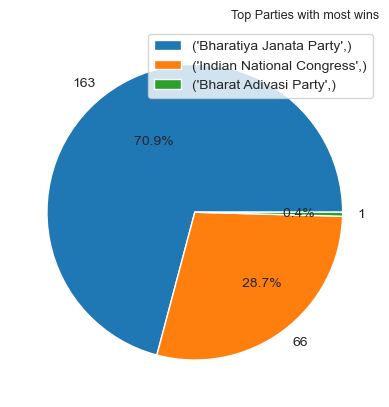

In [55]:
sns.set_style('whitegrid')
plt.pie(winning_party_count, labels = winning_party_count.values, autopct='%11.1f%%')
plt.title('Top Parties with most wins',fontsize='9', loc = 'right')
plt.legend(winning_party_count.index)
plt.show()

###### As shown on pie chart BJP won 163 while INC won 66 constituecies. Which is why we could see large number of votes gained by BJP and INC more than 21 millions and 17 million votes respectively.

In [56]:
# df = constituency_wise_data_df.pivot_table(index = 'constituency_name', columns = 'Party', values = 'Total_Votes').fillna(0)
# max_vote_df = df.max(axis = 1).reset_index()
# max_vote_df.columns = ['constituency_name', 'max_votes']

In [57]:
# constituency_wise_data_df = constituency_wise_data_df.merge(max_vote_df, on = 'constituency_name', how = 'left')
# max_votes_cons_df = constituency_wise_data_df.query("Total_Votes == max_votes")
# max_votes_cons_df.Party.value_counts()

In [58]:
# max_votes_cons_df[max_votes_cons_df.Party == 'Bharat Adivasi Party']

In [59]:
# constituency_wise_data_df[constituency_wise_data_df.constituency_name == 'Sailana']

In [60]:
# top_parties = constituency_wise_data_df.groupby('Party')['Total_Votes'].sum().nlargest(5)
# print(top_parties)


In [61]:
# constituency_wise_data_df

In [62]:
# constituency_wise_data_df.drop(columns =0, axis = 1)

### Top constituencies with high vote - Optional

In [158]:
# total number of votes casted across entire MP
total_state_voteshare = constituency_wise_data_df['Total_Votes'].sum()
total_state_voteshare

43495171

###### total number of votes casted across entire state of Madhya Pradesh in 2023 is 43495171

###### Total number votes per constituency is depends on the population of that constituency. Hence it is not an equitable comparision. I am calculating just for the practice.

In [64]:
# Total votes per constituency
constituency_total_voteshare = constituency_wise_data_df.groupby('constituency_number')['Total_Votes'].sum()
constituency_total_voteshare

constituency_number
1      211909
2      207102
3      180152
4      191080
5      186139
        ...  
226    234275
227    205658
228    170630
229    189146
230    159111
Name: Total_Votes, Length: 230, dtype: int64

In [159]:
# # Percent votes in each constituency optimized way
# constituency_pct_vote = {constituency_number: round((constituency_total/total_voteshare)*100, 2) for constituency_number, constituency_total in constituency_total_voteshare.items()}
# constituency_pct_vote

In [66]:
# Percent votes in each constituency
constituency_pct_vote = {}
for constituency_number, constituency_total in constituency_total_voteshare.items():
    pct_vote = (constituency_total/total_voteshare)*100
    constituency_pct_vote[constituency_number] = round(pct_vote, 2)

constituency_pct_vote

{1: 0.49,
 2: 0.48,
 3: 0.41,
 4: 0.44,
 5: 0.43,
 6: 0.39,
 7: 0.37,
 8: 0.33,
 9: 0.35,
 10: 0.37,
 11: 0.4,
 12: 0.42,
 13: 0.34,
 14: 0.43,
 15: 0.46,
 16: 0.44,
 17: 0.38,
 18: 0.42,
 19: 0.41,
 20: 0.32,
 21: 0.32,
 22: 0.41,
 23: 0.46,
 24: 0.44,
 25: 0.46,
 26: 0.53,
 27: 0.46,
 28: 0.42,
 29: 0.4,
 30: 0.45,
 31: 0.45,
 32: 0.4,
 33: 0.37,
 34: 0.39,
 35: 0.33,
 36: 0.39,
 37: 0.39,
 38: 0.4,
 39: 0.45,
 40: 0.39,
 41: 0.32,
 42: 0.45,
 43: 0.41,
 44: 0.38,
 45: 0.41,
 46: 0.37,
 47: 0.43,
 48: 0.39,
 49: 0.37,
 50: 0.42,
 51: 0.39,
 52: 0.39,
 53: 0.39,
 54: 0.43,
 55: 0.43,
 56: 0.45,
 57: 0.42,
 58: 0.49,
 59: 0.39,
 60: 0.43,
 61: 0.36,
 62: 0.36,
 63: 0.41,
 64: 0.42,
 65: 0.45,
 66: 0.43,
 67: 0.45,
 68: 0.33,
 69: 0.37,
 70: 0.34,
 71: 0.36,
 72: 0.36,
 73: 0.36,
 74: 0.35,
 75: 0.38,
 76: 0.43,
 77: 0.41,
 78: 0.41,
 79: 0.41,
 80: 0.37,
 81: 0.44,
 82: 0.43,
 83: 0.48,
 84: 0.48,
 85: 0.46,
 86: 0.27,
 87: 0.32,
 88: 0.37,
 89: 0.42,
 90: 0.45,
 91: 0.46,
 92: 0.43,
 

In [67]:
# High vote share constitency percent 
sorted_constituency_pct_vote = dict(sorted(constituency_pct_vote.items(), key = lambda item: item[1], reverse = True))
sorted_constituency_pct_vote

{208: 0.65,
 210: 0.63,
 155: 0.61,
 204: 0.61,
 117: 0.58,
 154: 0.58,
 180: 0.57,
 211: 0.56,
 115: 0.54,
 126: 0.54,
 156: 0.54,
 157: 0.54,
 205: 0.54,
 226: 0.54,
 26: 0.53,
 116: 0.53,
 151: 0.53,
 194: 0.53,
 195: 0.53,
 123: 0.52,
 178: 0.52,
 103: 0.51,
 107: 0.51,
 133: 0.51,
 187: 0.51,
 203: 0.51,
 106: 0.5,
 114: 0.5,
 132: 0.5,
 140: 0.5,
 209: 0.5,
 1: 0.49,
 58: 0.49,
 105: 0.49,
 109: 0.49,
 138: 0.49,
 171: 0.49,
 224: 0.49,
 225: 0.49,
 2: 0.48,
 83: 0.48,
 84: 0.48,
 95: 0.48,
 101: 0.48,
 104: 0.48,
 131: 0.48,
 136: 0.48,
 142: 0.48,
 167: 0.48,
 174: 0.48,
 179: 0.48,
 188: 0.48,
 193: 0.48,
 141: 0.47,
 161: 0.47,
 163: 0.47,
 184: 0.47,
 201: 0.47,
 222: 0.47,
 227: 0.47,
 15: 0.46,
 23: 0.46,
 25: 0.46,
 27: 0.46,
 85: 0.46,
 91: 0.46,
 94: 0.46,
 108: 0.46,
 111: 0.46,
 160: 0.46,
 165: 0.46,
 166: 0.46,
 170: 0.46,
 186: 0.46,
 189: 0.46,
 190: 0.46,
 30: 0.45,
 31: 0.45,
 39: 0.45,
 42: 0.45,
 56: 0.45,
 65: 0.45,
 67: 0.45,
 90: 0.45,
 96: 0.45,
 110: 0.45

In [68]:
sorted_constituency_total_voteshare = constituency_total_voteshare.sort_values(ascending = False)
sorted_constituency_total_voteshare

constituency_number
208    281428
210    273657
204    264978
155    264100
154    251118
        ...  
87     139868
21     139828
206    134672
99     129127
86     118630
Name: Total_Votes, Length: 230, dtype: int64

##### Top constituencies with high percent

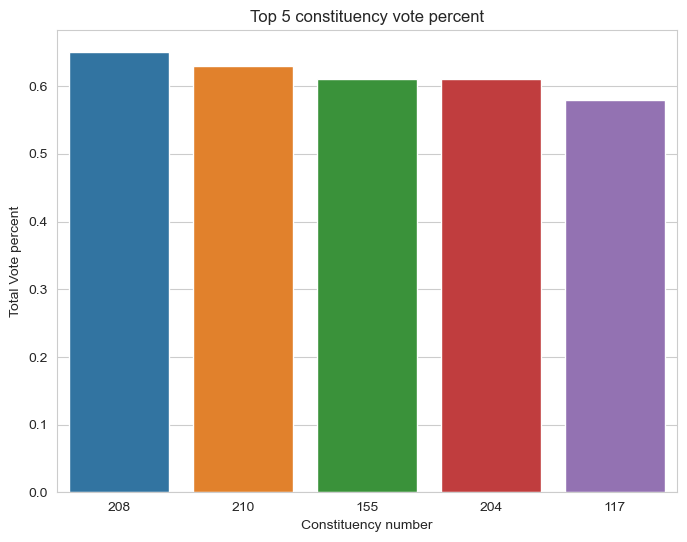

In [183]:
# Top 5 constituency in terms of vote percentage

total_voteshare = constituency_wise_data_df['Total_Votes'].sum()
total_vote_of_constituency = constituency_wise_data_df.groupby('constituency_number')['Total_Votes'].sum()

vote_of_top_5_constituency = {c_num:round((total/total_voteshare)*100, 2) for c_num, total in total_vote_of_constituency.items()}

df = pd.DataFrame(vote_of_top_5_constituency, index = ['constituency_number']).T
df.reset_index(inplace = True)
df.rename(columns = {'index':'constituency_number','constituency_number':'constituency_vote_percent'}, inplace =True)

top_5_vote_percent_constituency = df.sort_values(by = 'constituency_vote_percent', ascending = False ).head().reset_index(drop = True)

top_5_vote_percent_constituency = df.nlargest(5, 'constituency_vote_percent').reset_index(drop =True)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_vote_percent_constituency['constituency_number'], y=top_5_vote_percent_constituency['constituency_vote_percent'], order=top_5_vote_percent_constituency['constituency_number'])
plt.ticklabel_format(axis='y', style='plain')
plt.title('Top 5 constituency vote percent')
plt.xlabel('Constituency number')
plt.ylabel('Total Vote percent')
plt.show()



###### Low vote percent

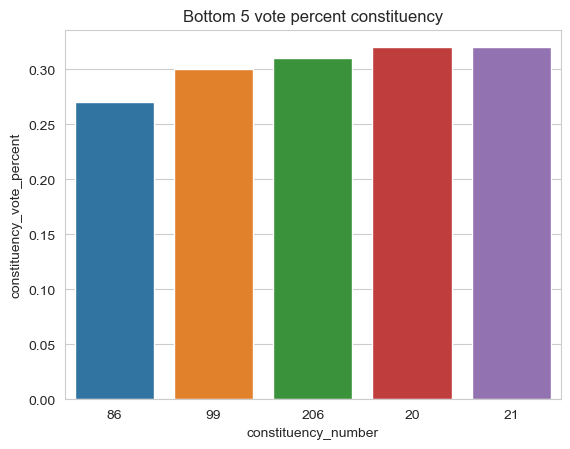

In [185]:
lowest_5_vote_percent_constituency = df.nsmallest(5, 'constituency_vote_percent').reset_index(drop = True)
lowest_5_vote_percent_constituency

sns.barplot(x=lowest_5_vote_percent_constituency['constituency_number'], y=lowest_5_vote_percent_constituency['constituency_vote_percent'], data = lowest_5_vote_percent_constituency, order =lowest_5_vote_percent_constituency['constituency_number'])
plt.title('Bottom 5 vote percent constituency')
plt.show()

## Candidate Vote Margin 

In [69]:
# Vote Margin win
top_2_largest = constituency_wise_data_df.groupby('constituency_number')['Total_Votes'].nlargest(2).reset_index() #convert to df
constituency_highest_vote = top_2_largest.groupby('constituency_number')['Total_Votes'].max()
constituency_second_highest_vote = top_2_largest.groupby('constituency_number')['Total_Votes'].min()

In [70]:
candidate_vote_margin = constituency_highest_vote - constituency_second_highest_vote
candidate_vote_margin = candidate_vote_margin.reset_index()
candidate_vote_margin.rename(columns = {'Total_Votes':'margin'}, inplace = True)
candidate_vote_margin

,constituency_number,margin
0,1,11130
1,2,18059
2,3,9805
3,4,30281
4,5,16008
...,...,...
225,226,22669
226,227,18107
227,228,18987
228,229,26283


In [71]:
candidate_vote_margin['margin'].mean()

22432.13913043478

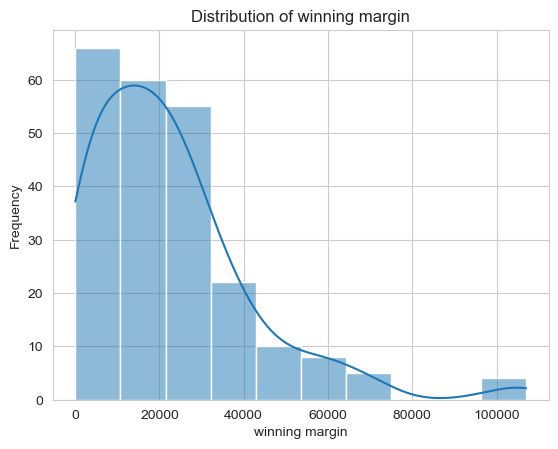

In [73]:
sns.histplot(candidate_vote_margin['margin'], kde = True, bins = 10)
plt.title('Distribution of winning margin')
plt.xlabel('winning margin')
plt.ylabel('Frequency')
plt.show()

###### From the above histogram we can see that there are candidates who won the constituencies with resounding vote margin of  more than 100000 votes. Therefore we will explore the constituencies with more than 80000 vote margin

In [74]:
# Constituencies with more than 80000 winning margin
candidate_vote_margin[candidate_vote_margin['margin'] > 80000]

,constituency_number,margin
153,154,106668
154,155,97910
155,156,104974
204,205,107047


### Top 5 winning vote margin constituencies

In [75]:
# top 5 constituency with high margin
high_margin_constitency = candidate_vote_margin.nlargest(5, 'margin')
high_margin_constitency  #.set_index('constituency_number',drop = True).plot(kind = 'bar')

,constituency_number,margin
204,205,107047
153,154,106668
155,156,104974
154,155,97910
38,39,72800


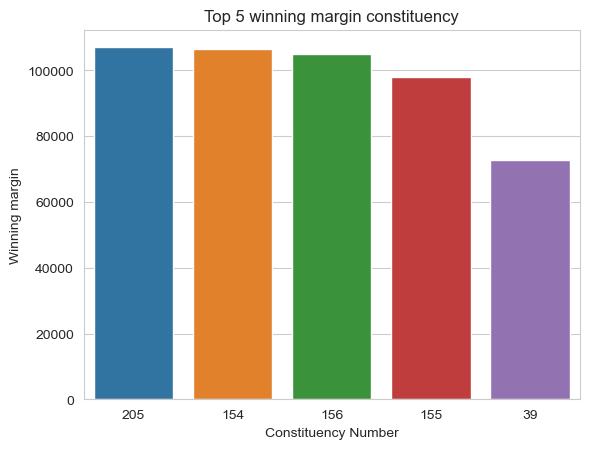

In [76]:
sns.barplot(x = 'constituency_number', y = 'margin', data = high_margin_constitency, order = high_margin_constitency['constituency_number'])
plt.title('Top 5 winning margin constituency')
plt.xlabel('Constituency Number')
plt.ylabel('Winning margin')
plt.show()

###### Bottom 5 winning margin constituency

In [77]:
# Bottom 5 constituency with winning margin
low_margin_constitency = candidate_vote_margin.nsmallest(5, 'margin').reset_index(drop = True)
low_margin_constitency 

,constituency_number,margin
0,167,28
1,213,290
2,200,356
3,108,551
4,175,589


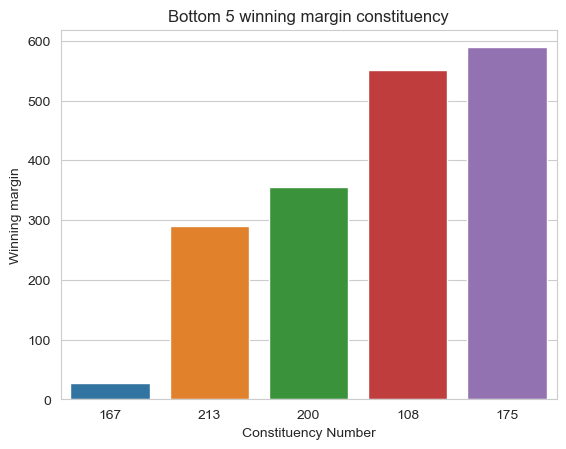

In [78]:
sns.barplot(x = 'constituency_number', y = 'margin', data = low_margin_constitency, order = low_margin_constitency['constituency_number'])
plt.title('Bottom 5 winning margin constituency')
plt.xlabel('Constituency Number')
plt.ylabel('Winning margin')
plt.show()

#### closely fought constituencies

###### we will consider less than 7000 vote margin as closely fought constituencies.

In [79]:
# Vote margin less than 7000 will be considered as closely fought

close_fight = candidate_vote_margin[candidate_vote_margin['margin']<7000]
close_fight

,constituency_number,margin
12,13,607
13,14,3282
16,17,2536
18,19,2267
19,20,2558
22,23,3103
30,31,4505
33,34,5422
34,35,6155
36,37,2178


In [80]:
# Count of closely fought constituencies
candidate_vote_margin[candidate_vote_margin['margin']<7000].count()

constituency_number    53
margin                 53
dtype: int64

###### There are total 53 constituencies with less than 7000 vote margin

##### Sweeping win margin

###### We will be considering more than 50000 vote margin as sweeping/easy winning constituencies 

In [165]:
# Vote margin greater than 50000 will be considered as sweeping win

easy_win_constituency = candidate_vote_margin[candidate_vote_margin['margin']>50000]
easy_win_constituency

,constituency_number,margin
26,27,50973
28,29,66454
29,30,61570
38,39,72800
54,55,51351
56,57,57021
78,79,59879
90,91,50993
120,121,56529
153,154,106668


In [82]:
candidate_vote_margin[candidate_vote_margin['margin']>50000].count()

constituency_number    20
margin                 20
dtype: int64

###### There are total of 20 constituencies with easy win margin

### parties with close fight and easy win

In [83]:
winning_party_index = constituency_wise_data_df.groupby('constituency_number')['percent_of_votes'].idxmax()
winning_party = constituency_wise_data_df.loc[winning_party_index, ['constituency_number', 'Party']].reset_index(drop = True)
winning_party

,constituency_number,Party
0,1,Indian National Congress
1,2,Indian National Congress
2,3,Bharatiya Janata Party
3,4,Indian National Congress
4,5,Bharatiya Janata Party
...,...,...
225,226,Bharatiya Janata Party
226,227,Bharatiya Janata Party
227,228,Bharatiya Janata Party
228,229,Bharatiya Janata Party


In [173]:
# Closly fought parties with less than 7000 vote margin

close_count  = winning_party[winning_party['constituency_number'].isin(close_fight.constituency_number)]
close_count

,constituency_number,Party
12,13,Indian National Congress
13,14,Indian National Congress
16,17,Bharatiya Janata Party
18,19,Indian National Congress
19,20,Bharatiya Janata Party
22,23,Bharatiya Janata Party
30,31,Indian National Congress
33,34,Bharatiya Janata Party
34,35,Indian National Congress
36,37,Bharatiya Janata Party


In [176]:
close_count['Party'].value_counts()

Indian National Congress    27
Bharatiya Janata Party      25
Bharat Adivasi Party         1
Name: Party, dtype: int64

In [179]:
winning_party[winning_party['constituency_number'].isin(close_fight.constituency_number)].count()

constituency_number    53
Party                  53
dtype: int64

###### As per the above analysis total of 53 constituencies had close fight with INC with 27, BJP  with 25 and Bharat Adivasi Party with 1 constituency

In [180]:
# Easy win parties with greater than 50000 votes

easy_count = winning_party[winning_party['constituency_number'].isin(easy_win_constituency['constituency_number'])]
easy_count

,constituency_number,Party
26,27,Bharatiya Janata Party
28,29,Bharatiya Janata Party
29,30,Bharatiya Janata Party
38,39,Bharatiya Janata Party
54,55,Bharatiya Janata Party
56,57,Bharatiya Janata Party
78,79,Bharatiya Janata Party
90,91,Bharatiya Janata Party
120,121,Bharatiya Janata Party
153,154,Bharatiya Janata Party


In [181]:
easy_count['Party'].value_counts()

Bharatiya Janata Party    20
Name: Party, dtype: int64

In [87]:
winning_party[winning_party['constituency_number'].isin(easy_win_constituency['constituency_number'])].count()

constituency_number    20
Party                  20
dtype: int64

###### Easy win margin constituencies dominated by BJP with 20 constituencies.

## Major Party analysis

In [186]:
constituency_reshaped_data = constituency_wise_data_df.pivot_table(index ='constituency_number', columns ='Party', values='Total_Votes', fill_value=0)
constituency_reshaped_data

Party,Aadim Samaj Party,Aam Aadmi Party,Aam Bhartiya Party,Aapka Gantantra Party,Aapki Apni Party (Peoples),Aazad Samaj Party (Kanshi Ram),Adarshwaadi Congress Party,Ahinsa Samaj Party,Akhand Bharat Chetna Dal,Akhand Bharat Samrajya Party,Akhil Bhartiya Aarakshit Samaj Party,Akhil Bhartiya Apna Dal,All India Forward Bloc,All India Majlis-E-Ittehadul Muslimeen,Ambedkarite Party of India,Azad Samaj Party,Bahujan Dravida Party,Bahujan Gondwana Party,Bahujan Mukti Party,Bahujan Samaj Party,Bhagidari Party(P),Bharastachar Apraadh Mukt Nyay Dal,Bharat Adivasi Party,Bharatiya Jan Morcha Party,Bharatiya Janata Party,Bharatiya Majdoor Janta Party,Bharatiya Sabhyata Party,Bharatiya Sampuran Krantikari Party,Bhartiya Gan Varta Party,Bhartiya Ganrajya Party,Bhartiya Krantisangh Party,Bhartiya Samajik Party,Bhartiya Shakti Chetna Party,Bhartiya Swarnim Yug Party,Bhartiya Tribal Party,Bhartiya Veer Dal,Communist Party of India,Communist Party of India (Marxist),Gana Suraksha Party,Gondvana Gantantra Party,Independent,Indian National Congress,Indian Peoples Adhikar Party,Jai Lok Party,Jai Prakash Janata Dal,Jan Adhikar Party,Jan Sangh Party,Jan Sewa Driver Party,Janata Congress,Janata Dal (United),...,Mahakaushal Rashtriya Party,Malwa Congress,Narmadakhand Navnirman Sena,National Jagaran Party,National World Leader Party,National Youth Party,Navodaya Jantantrik Party,None of the Above,Nyaydharmsabha,Parivartan Party of India,Parivartan Samaj Party,Peoples Party of India (Democratic),Pichhara Samaj Party United,Prahar Janshakti Party,"Proutist Bloc, India",Public Political Party,Rashtra Nirman Party,Rashtravadi Bharat Party,Rashtriya Gondvana Party,Rashtriya Jan Awaz Party,Rashtriya Jansanchar Dal,Rashtriya Krantikari Samajwadi Party,Rashtriya Navjagran Party,Rashtriya Pratibha Party,Rashtriya Rakshak Morcha,Rashtriya Samaj Paksha,Rashtriya Samanta Dal,Rashtriya mahan Gantantra Party,Republican Party of India (A),Right to Recall Party,Sainik Samaj Party,Samajwadi Aam Janata Dal,Samajwadi Jan Parishad,Samajwadi Party,Saman Aadmi Saman Party,Samata Samadhan Party,Samatamoolak Samaj Party,Sanyukt Kranti Party,Sapaks Party,Sarvadharam Party (Madhya Pradesh),Satyanishth Jan Sewak Party,Smart Indians Party,Social Democratic Party Of India,Socialist Unity Centre Of India (COMMUNIST),Swatantra Jantaraj Party,United National Party,Vanchit Bahujan Aaghadi,Vastavik Bharat Party,Vikas India Party,Vindhya Janta Party
constituency_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,386,0,0,0,0,0,0,0,0,0,0,0,0,0,23054,0,0,0,0,85714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425.142857,96844,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1801,0,167,0,0,0,0,0,0,0,0,0,0,0,234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,733,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34346,0,0,0,0,51587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6068.000000,69646,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1895,0,0,0,0,0,0,0,1084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,459,0,0,0,0,0,0,0,0,0,0,0,0,0,51153,0,0,0,0,66787,0,0,111,0,0,0,0,0,0,0,0,0,1320,0,0,207.000000,56982,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,589,0,0,0,0,0,0,0,349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1966,0,0,0,463,0,0,0,0,0,0,236,0,0,0,0,0,0,37038,0,0,0,0,58972,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199.500000,89253,0,0,0,94,0,0,0,0,...,0,0,0,0,0,0,0,853,0,248,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,624,0,0,0,0,0,0,0,0,0,0,0,0,0,56500,0,0,0,0,72508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164.000000,55289,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [97]:
constituency_reshaped_data['Bharatiya Janata Party'].mean()

91809.55217391305

In [200]:
constituency_reshaped_data['Indian National Congress'].mean()

76398.18260869566

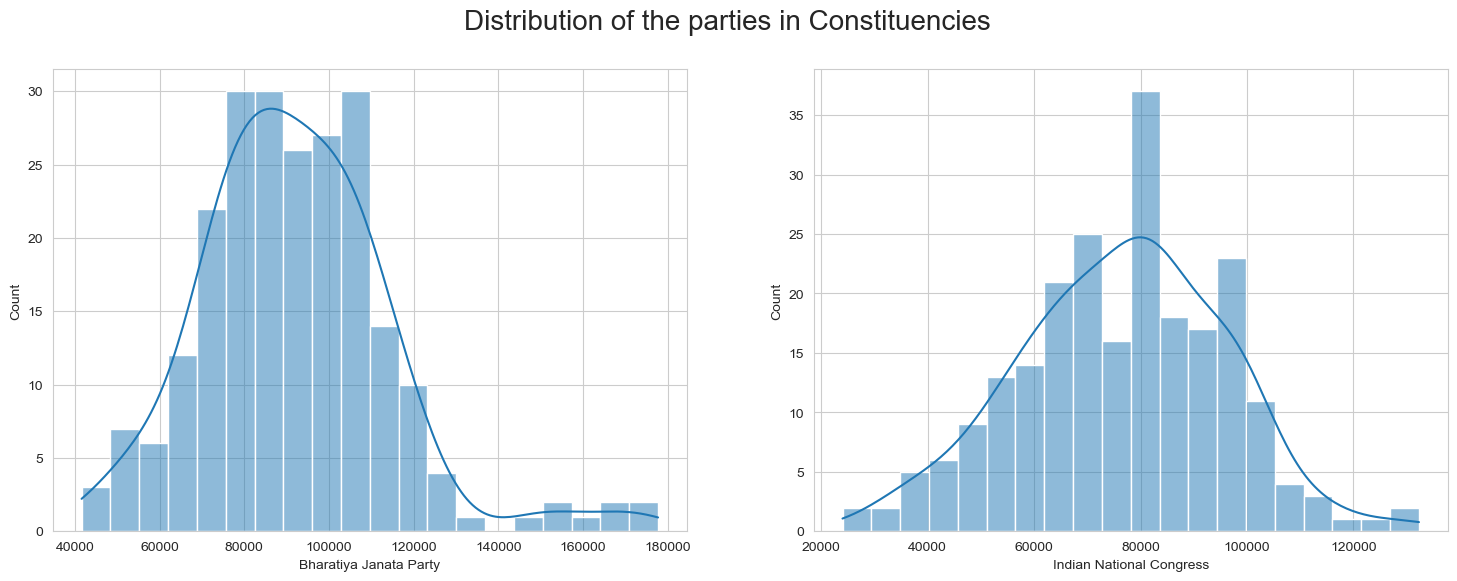

In [197]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(constituency_reshaped_data['Bharatiya Janata Party'], kde = True, bins =20, ax = ax[0])
sns.histplot(constituency_reshaped_data['Indian National Congress'], kde = True, bins =20, ax = ax[1])
fig.suptitle('Distribution of the parties in Constituencies', fontsize = 20)
plt.show()

In [210]:
constituency_wise_data_df[(constituency_wise_data_df['Party'] =='Bharatiya Janata Party') & (constituency_wise_data_df['Total_Votes'] > 150000)]

,S.N.,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,percent_of_votes,constituency_number,constituency_name
2074,2,KRISHNA GAUR,Bharatiya Janata Party,171318,1841,173159,68.96,154,Govindpura
2094,4,RAMESHWAR SHARMA,Bharatiya Janata Party,176495,1260,177755,67.31,155,Huzur
2099,2,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,163823,1128,164951,70.70,156,Budhni
2513,2,KAILASH VIJAYVARGIYA,Bharatiya Janata Party,156960,1163,158123,59.67,204,Indore-1
2525,3,RAMESH MENDOLA,Bharatiya Janata Party,167939,1132,169071,71.58,205,Indore-2
2581,3,MADHU VERMA,Bharatiya Janata Party,150107,1565,151672,55.42,210,Rau
2591,1,TULSIRAM SILAWAT,Bharatiya Janata Party,149771,1277,151048,61.70,211,Sanwer


In [215]:
constituency_wise_data_df[(constituency_wise_data_df['Party'] =='Indian National Congress') & (constituency_wise_data_df['Total_Votes'] > 125000)]

,S.N.,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,percent_of_votes,constituency_number,constituency_name
1749,1,KAMAL NATH,Indian National Congress,129829,2473,132302,56.44,126,Chhindwara
2553,4,SATYANARAYAN RAMESHWAR PATEL,Indian National Congress,128045,1017,129062,45.86,208,Indore-5


###### From the above histogram we can see that BJP has recieved large vote range  between ~60000 to ~120000 however on INC vote range ~50000 to ~110000. Also BJP has received votes of more than 150000 at 7 constituencies. While INC has not recieved more than 150000 in any constituency. INC has recieved 125000 votes only at 2 constituencies.

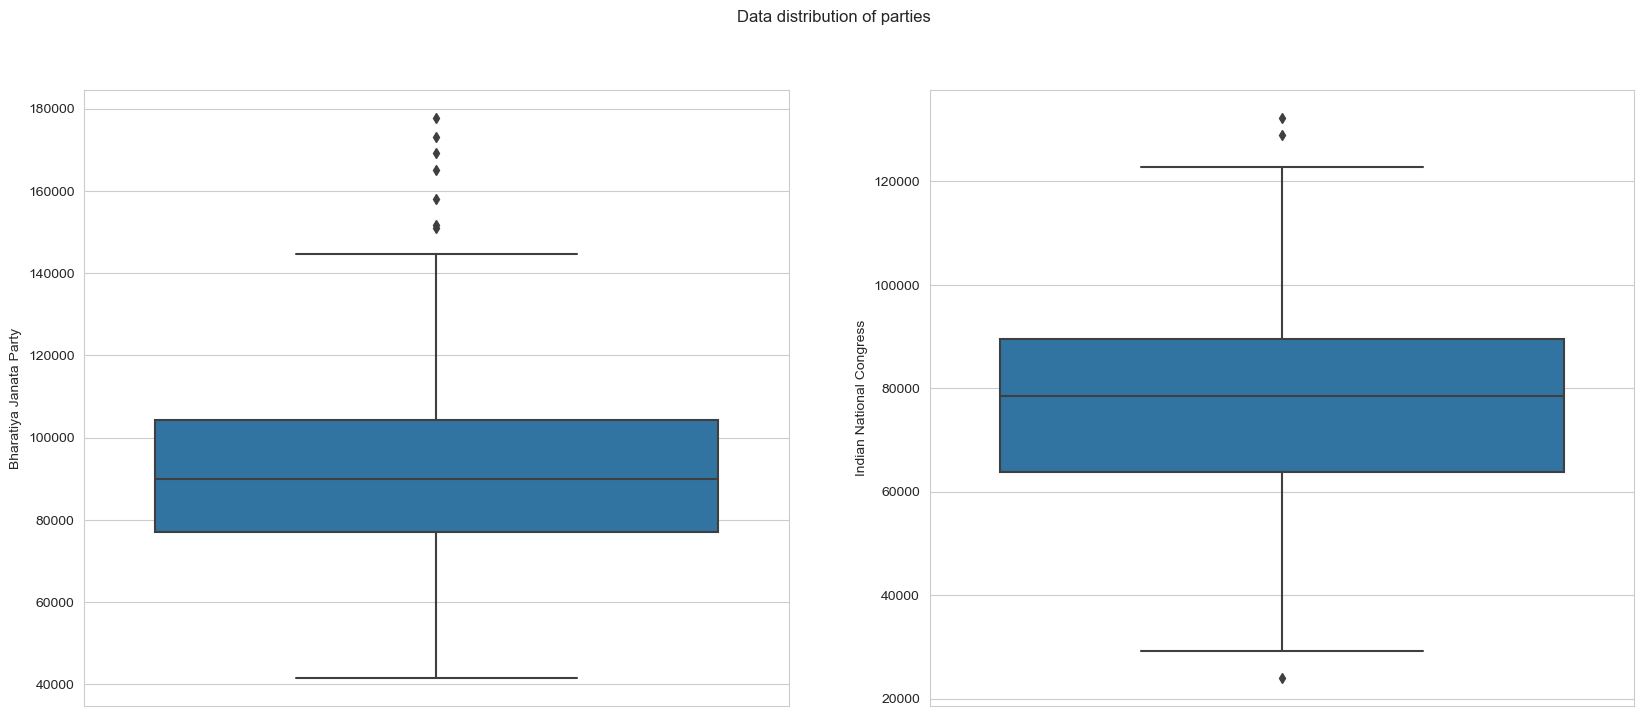

In [199]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
sns.boxplot(y=constituency_reshaped_data["Bharatiya Janata Party"], ax = ax[0])
sns.boxplot(y=constituency_reshaped_data["Indian National Congress"], ax = ax[1])
fig.suptitle('Data distribution of parties')
plt.show()

###### In the above boxplot we can see that few more vote share in both the boxplot. However these are good performence compared to the other constituencies.

### Thses are the basic analysis of the MP election 2023. In order to get to the inference on a particular subject this is not sufficient. Hence we may have to look at previous election data, other important aspects related to the election, party strategy and important factors related to the state which may influence the outcome of the election.